In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import timeit

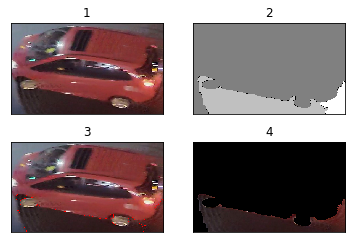

In [2]:
img_pwd = './sample4.jpg'
img = cv2.imread(img_pwd)


#input BGR image
#output img2: image with edge
#output markers: image mask
#for color detection, you can only apply color_detect on the image[mask != 1] part.
def night_car_seg(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 3)
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    sure_bg = np.uint8(sure_bg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1
    markers[unknown==255] = 0
    markers = cv2.watershed(img,markers)
    img2 = img.copy()
    img2[markers == -1] = [255,0,0]
    return markers,img2


mask,img2 = night_car_seg(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img3 = img.copy()
img3[mask == 1] = [0,0,0]

plt.subplot(221),plt.imshow(img)
plt.title('1'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(mask,cmap='gray')
plt.title('2'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img2)
plt.title('3'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img3)
plt.title('4'), plt.xticks([]), plt.yticks([])
plt.show()